In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Data-Analysis-Projects/Credit_Card_Fraud_Detection')
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/Data-Analysis-Projects/Credit_Card_Fraud_Detection


## Importing Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
classification_report, confusion_matrix, precision_recall_curve, \
average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Custom Functions
import curves as C

In [0]:
dataset = pd.read_csv('creditcard.csv')
dataset_X = dataset.drop(['Class'], axis = 1)
dataset_y = dataset['Class']

## Splitting the dataset into the Training set and Test set

In [0]:
def split_data(X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)
    print('train-set size: ', len(y_train), 
          '\ntest-set size: ', len(y_test))    
    print('fraud cases in train-set', sum(y_train),
          '\nfraud cases in test-set: ', sum(y_test))
    return X_train, X_test, y_train, y_test

## Define function to get predictions

In [0]:
def get_predictions(y_true, y_pred): 
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    '''
    result = {'Accuracy': accuracy, 
              'Precision': precision, 
              'Recall': recall, 
              'F1_score': f1, 
              'Confusion_Matrix': cm}
    '''
    sns.heatmap(cm, cmap = "coolwarm", annot = True, linewidths = 0.5)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted class")
    plt.ylabel("Real class")
    plt.show()
    print('==============================')
    print(cm)
    print('==============================')
    print('accuracy = {}'.format(accuracy))
    print('precision = {}'.format(precision))
    print('recall = {}'.format(recall))
    print('f1 score = {}'.format(f1))
    print('==============================')
    print(classification_report(y_true, y_pred))
    return report

## Case 1: Drop 'Time', 'Amount'

In [0]:
drop_list = ['Time', 'Amount']
# drop_list = ['Time', 'Amount', 'V28', 'V27', 'V26', 'V25', 'V24', 'V23', 'V22', 'V20', 'V15', 'V13', 'V8']
X = dataset_X.drop(drop_list, axis = 1)
predictor_name = X.columns
X = X.values
y = dataset_y.values
print(predictor_name)
X_train, X_test, y_train, y_test = split_data(X, y)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')
train-set size:  199364 
test-set size:  85443
fraud cases in train-set 384 
fraud cases in test-set:  108


## Naive Bayes

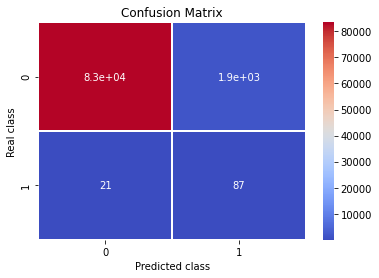

[[83430  1905]
 [   21    87]]
accuracy = 0.9774586566482918
precision = 0.043674698795180725
recall = 0.8055555555555556
f1 score = 0.08285714285714285
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85335
           1       0.04      0.81      0.08       108

    accuracy                           0.98     85443
   macro avg       0.52      0.89      0.54     85443
weighted avg       1.00      0.98      0.99     85443



In [0]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_score = nb_clf.predict_proba(X_test)[:, 1]
y_pred = nb_clf.predict(X_test)
nb_report = get_predictions(y_true = y_test, y_pred = y_pred)

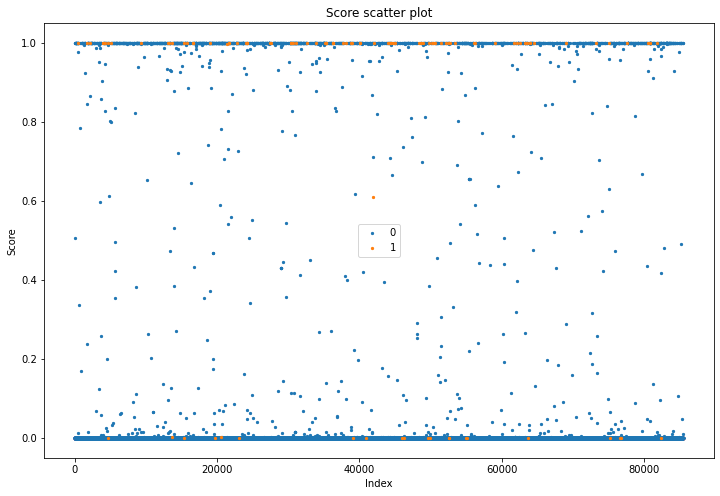

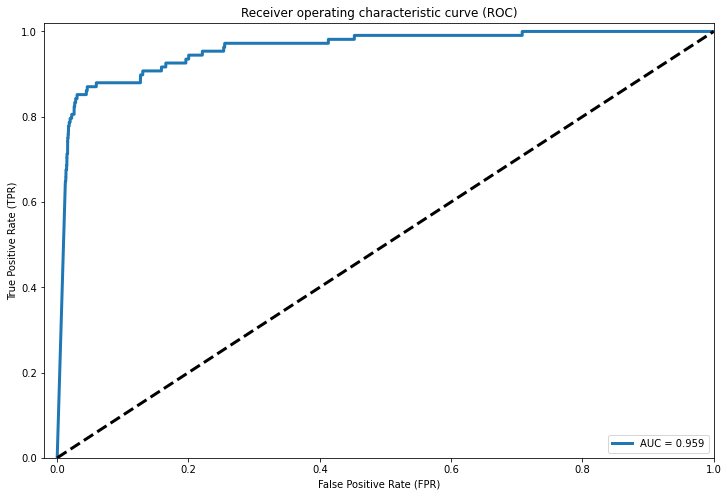

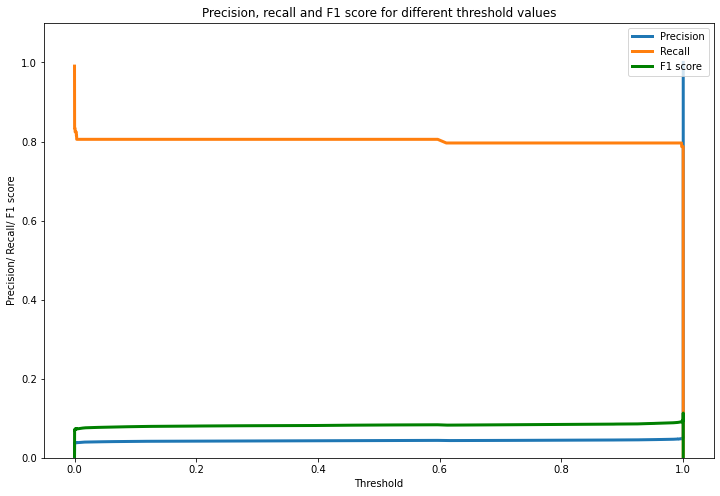

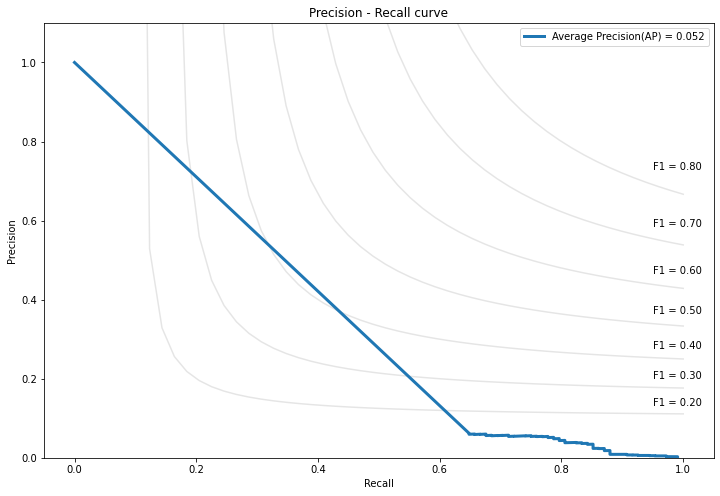

In [0]:
# Plot scores, ROC, Precision, Recall, F1 curve, Precision-Recall curve
C.plot_scores(y_true = y_test, y_score = y_score)
fpr_nb, tpr_nb, roc_auc_nb = C.plot_ROC(y_true = y_test, y_score = y_score)
precision_nb, recall_nb, threshold_nb, f1_scores_nb = C.plot_precision_recall_vs_threshold(y_true = y_test, y_score = y_score)
_, _, pr_auc_nb = C.plot_precision_recall(y_true = y_test, y_score = y_score)

 ## Logistic Regression

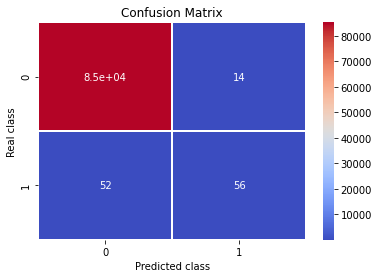

[[85321    14]
 [   52    56]]
accuracy = 0.9992275552122467
precision = 0.8
recall = 0.5185185185185185
f1 score = 0.6292134831460674
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.80      0.52      0.63       108

    accuracy                           1.00     85443
   macro avg       0.90      0.76      0.81     85443
weighted avg       1.00      1.00      1.00     85443



In [0]:
lr_clf = LogisticRegression(solver = 'liblinear', random_state = 0)
lr_clf.fit(X_train, y_train)
y_score = lr_clf.predict_proba(X_test)[:, 1]
y_pred = lr_clf.predict(X_test)
lr_report = get_predictions(y_true = y_test, y_pred = y_pred)

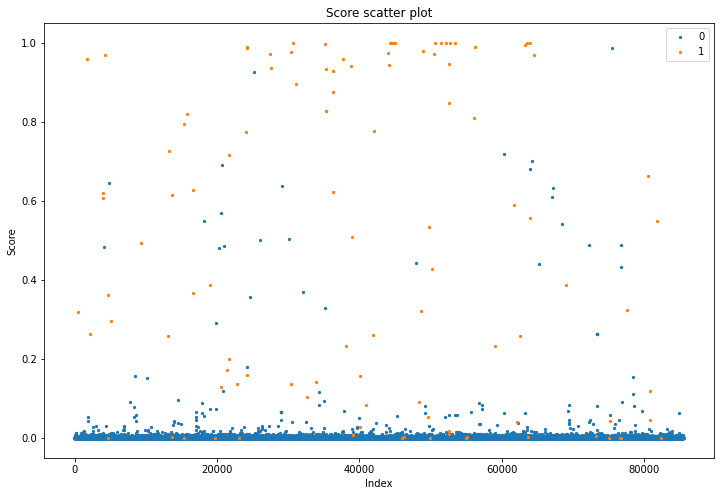

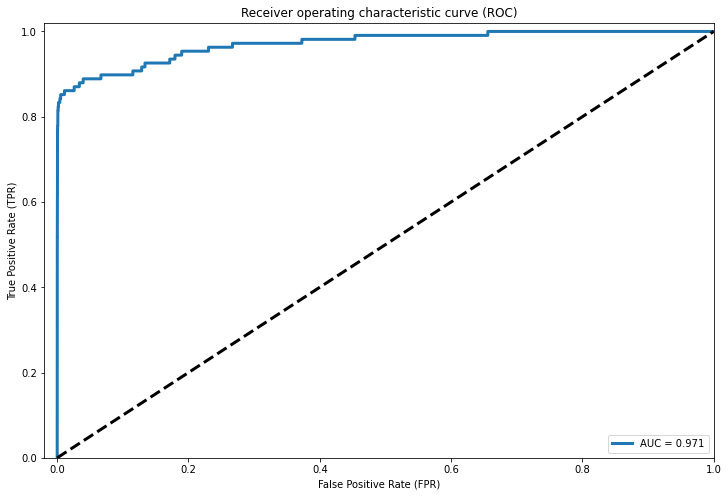

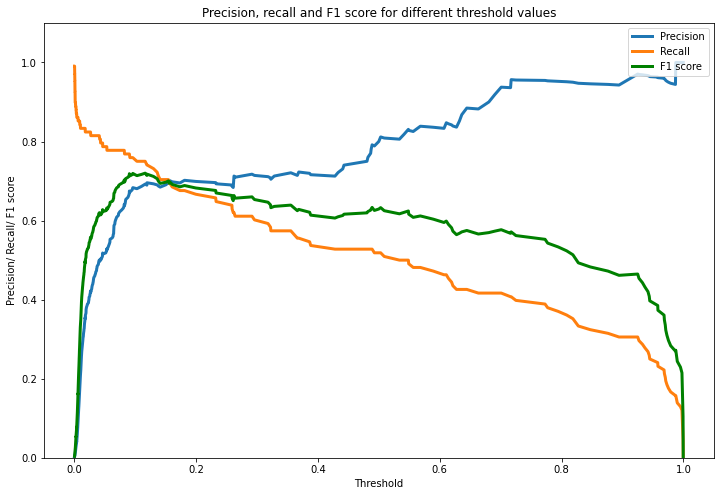

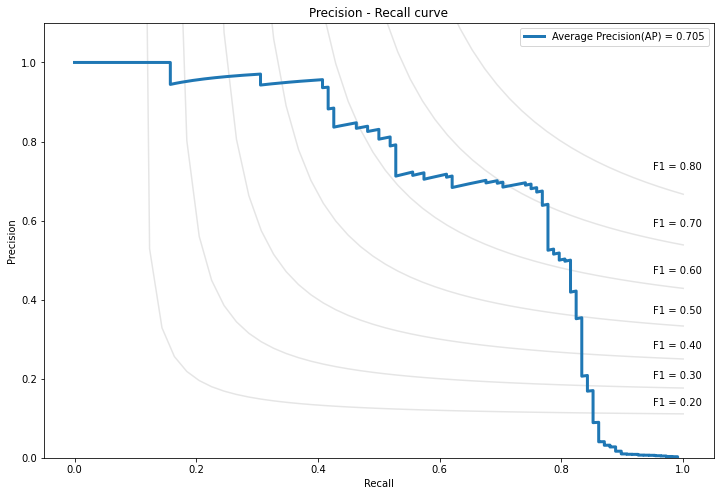

In [0]:
# Plot scores, ROC, Precision, Recall, F1 curve, Precision-Recall curve
C.plot_scores(y_true = y_test, y_score = y_score)
fpr_lr, tpr_lr, roc_auc_lr = C.plot_ROC(y_true = y_test, y_score = y_score)
precision_lr, recall_lr, threshold_lr, f1_scores_lr = C.plot_precision_recall_vs_threshold(y_true = y_test, y_score = y_score)
_, _, pr_auc_lr = C.plot_precision_recall(y_true = y_test, y_score = y_score)

## Compare two models

In [0]:
def roc_curve_for_all_models():
    plt.figure(figsize = (8, 6))
    plt.plot(fpr_lr, tpr_lr, label = 'LogisticRegression: AUC = {:.4f}'.format(roc_auc_lr), linewidth = 2)
    plt.plot(fpr_nb, tpr_nb, label = 'Naive Bayes: AUC = {:.4f}'.format(roc_auc_nb), linewidth = 2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth = 2)
    plt.xlim([-0.05, 1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.legend(loc = 'lower right')
    plt.savefig('lr_vs_nb_roc.png')
    plt.show()

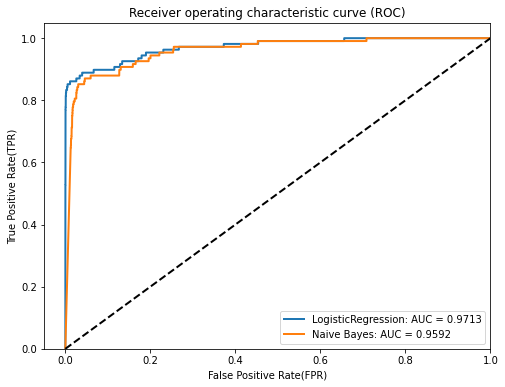

In [0]:
roc_curve_for_all_models()

In [0]:
def precision_recall_for_all_models():
    plt.figure(figsize = (8, 6))
    f_scores = np.linspace(0.2, 0.8, num = 4)
    for f_score in f_scores:
        x = np.linspace(0.001, 1)
        y = f_score * x / (2 * x - f_score)
        plt.plot(x[y >= 0], y[y >= 0], color = 'gray', alpha = 0.2)
        plt.annotate('F1 = {:.2f}'.format(f_score), xy = (0.88, y[45] + 0.02))

    plt.plot(recall_lr, precision_lr, label = 'LogisticRegression: AUC = {:.4f}'.format(pr_auc_lr), linewidth = 2)
    plt.plot(recall_nb, precision_nb, label = 'Naive Bayes: AUC = {:.4f}'.format(pr_auc_nb), linewidth = 2)
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision - Recall Curve')
    plt.legend(loc = 'lower left')
    plt.savefig('lr_vs_nb_pr.png')
    plt.show()

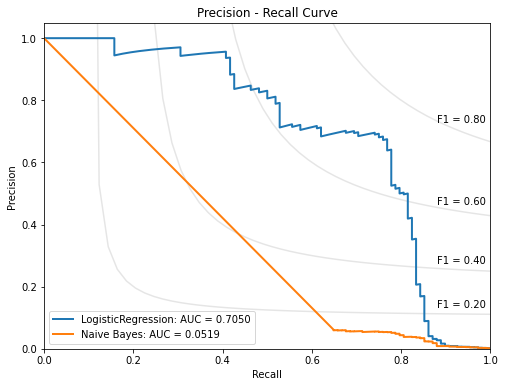

In [0]:
precision_recall_for_all_models()

In [0]:
print(nb_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85335
           1       0.04      0.81      0.08       108

    accuracy                           0.98     85443
   macro avg       0.52      0.89      0.54     85443
weighted avg       1.00      0.98      0.99     85443



In [0]:
print(lr_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85335
           1       0.80      0.52      0.63       108

    accuracy                           1.00     85443
   macro avg       0.90      0.76      0.81     85443
weighted avg       1.00      1.00      1.00     85443

